In [2]:
import pandas as pd
import numpy as np


from sklearn.naive_bayes import GaussianNB
import sklearn.pipeline
import sklearn.grid_search
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
gpa = pd.read_csv('gpa.csv')
gpa = gpa.drop('slno', 1)
gpa['class'] = gpa.low.map({5.5: 0,
                            6.5: 1,
                            7.5: 2
                           })
gpa.drop(['low', 'high'], 1, inplace=True)
gpa.info()
gpa.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 4 columns):
S1S2     132 non-null float64
S3       132 non-null float64
S4       132 non-null float64
class    132 non-null int64
dtypes: float64(3), int64(1)
memory usage: 5.2 KB


,S1S2,S3,S4,class
count,132.000000,132.000000,132.000000,132.000000
mean,7.006439,6.958864,7.093561,0.969697
std,0.841445,0.794846,0.828554,0.780872
min,5.500000,5.500000,5.500000,0.000000
25%,6.465000,6.400000,6.685000,0.000000
50%,6.895000,6.900000,7.150000,1.000000
75%,7.600000,7.562500,7.625000,2.000000
max,8.960000,8.800000,9.010000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xae6bebcc>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xae5db1ec>]], dtype=object)

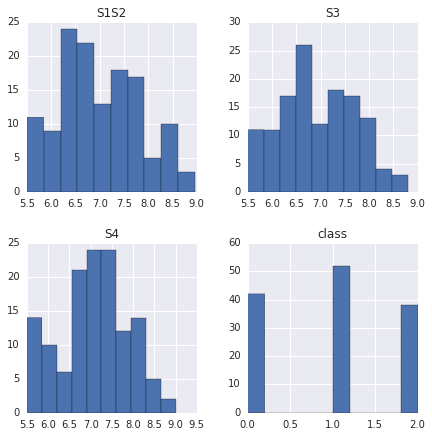

In [16]:
gpa.hist(figsize=(7, 7))

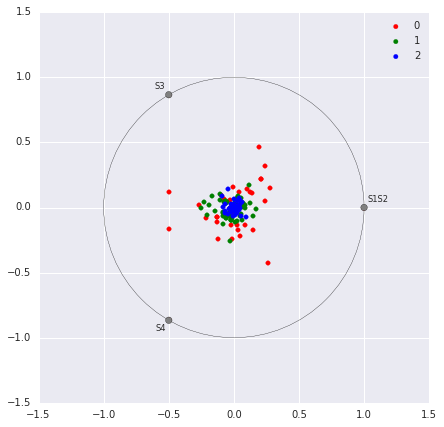

In [17]:
plt.figure(figsize=(7, 7))
pd.tools.plotting.radviz(gpa, 'class', color=['r', 'g', 'b'])

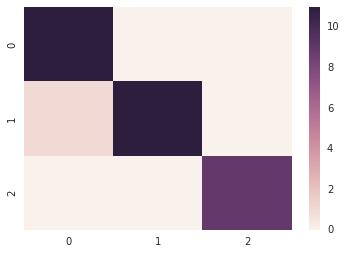

In [18]:
clf = GaussianNB()
mask = np.random.random(len(gpa)) < 0.7
train, validate = gpa[mask], gpa[~mask]

clf.fit(train.drop('class', 1), train['class'])

predictions = clf.predict(validate.drop('class', 1))
sns.heatmap(sklearn.metrics.confusion_matrix(validate['class'], predictions))